In [17]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    r"C:\Users\Tasnia Wahid\Desktop\CryptoClustering\Resources\crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [12]:
# Assuming pandas is already imported and you have the correct path to your CSV
df_market_data = pd.read_csv(
    r"C:\Users\Tasnia Wahid\Desktop\CryptoClustering\Resources\crypto_market_data.csv",
    index_col="coin_id")

# Selecting numerical features to scale
features = df_market_data.columns

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
# Use df_market_data instead of df
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data[features]), columns=features)

# If 'coin_id' was the index, let's put it back
df_market_data_scaled.index = df_market_data.index

# Display the first few rows to verify
print(df_market_data_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [13]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data[features]), columns=features)


# Copy the crypto names from the original data

# Set the coinid column as index

df_market_data_scaled.index = df_market_data.index

# Display sample data
print(df_market_data_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [14]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)  # 1 to 11


In [15]:
# Create an empty list to store the inertia values

inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Assuming you have already imported KMeans
# from sklearn.cluster import KMeans

# Range of k values
k_range = range(1, 12)

for k in k_range:
    # 1. Create a KMeans model with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to your scaled data
    model.fit(df_market_data_scaled)
    
    # 3. Append the model's inertia to the inertia list
    inertia_values.append(model.inertia_)


C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

   k     inertia
0  1  287.000000
1  2  195.820218
2  3  123.190482
3  4   79.022435
4  5   65.302379


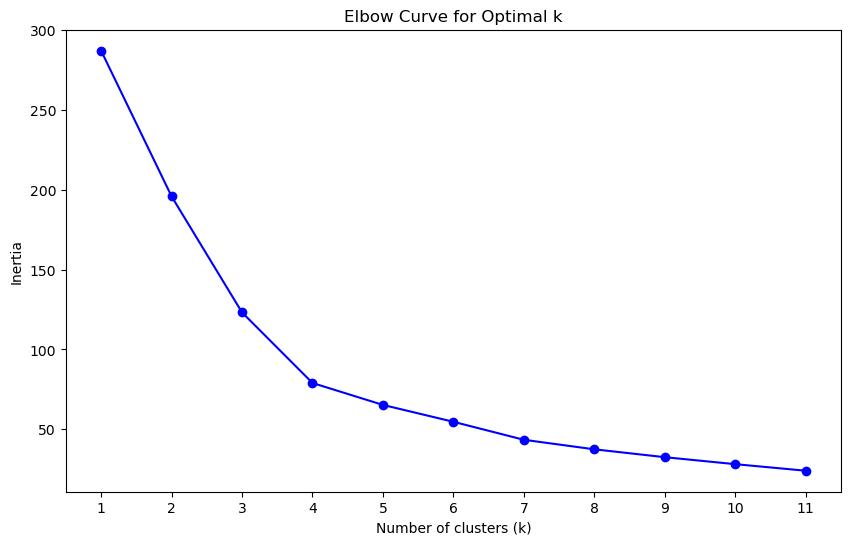

In [16]:
# Create a dictionary with the data to plot the Elbow curve
# Creating a dictionary with k values and their corresponding inertia values
elbow_data = {
    'k': k_range,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd

# Creating a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)

# Displaying the DataFrame to verify its creation
print(elbow_df.head())

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()


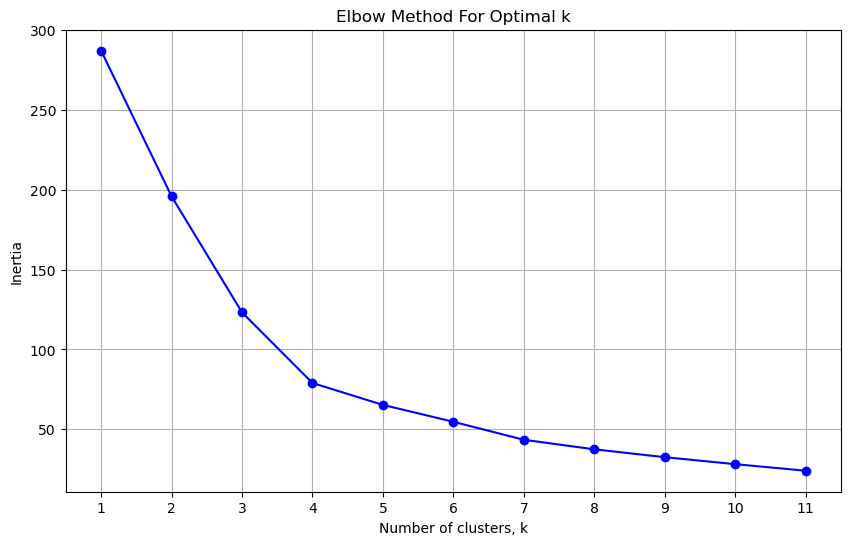

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')  # Line plot of k vs. inertia
plt.title('Elbow Method For Optimal k')  # Title of the plot
plt.xlabel('Number of clusters, k')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.xticks(k_range)  # Ensure all k values are marked on the x-axis for clarity
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.show()  # Display the plot

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

Looking at the Elbow plot you've provided, the best value for k is the point on the curve where the inertia starts decreasing at a slower rate and becomes more gradual. This point is typically where the curve starts to "bend".

From the graph, the elbow seems to occur at 
k=4. After this point, the inertia continues to decrease but at a slower rate, which indicates that additional clusters do not contribute as significantly to explaining the variance in the data.

Therefore, based on this Elbow plot, the best value for k would be 4. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [19]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [21]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [22]:
# Predict the clusters to group the cryptocurrencies
crypto_clusters = kmeans_model.predict(df_market_data_scaled)

# Add the predicted cluster labels to the original scaled DataFrame
df_market_data_scaled['cluster'] = crypto_clusters

# Display the first few entries of your DataFrame to verify
print(df_market_data_scaled.head())

# Print the resulting array of cluster values
print(crypto_clusters)


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [23]:
# Create a copy of the original scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

# Now you can use df_market_data_scaled_copy for further analysis or modifications without
# altering the original df_market_data_scaled DataFrame.


In [24]:
# Add the predicted clusters to the copied DataFrame
df_market_data_scaled_copy['cluster'] = crypto_clusters

# Display the first few rows to see the new column with the cluster labels
print(df_market_data_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [25]:
# Ensure hvplot is installed. If not, you can install it using:
# pip install hvplot

# Import hvplot.pandas after installing it
import hvplot.pandas  

# Create the scatter plot
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id'],  # assuming 'coin_id' is the column with cryptocurrency names
    colormap='Category10',   # or any other colormap you prefer
    title='Cryptocurrency Clusters: 24h vs 7d Price Change Percentage'
)

# Display the plot
scatter_plot



:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [26]:
from sklearn.decomposition import PCA

# Create a PCA model instance with 3 components
pca_model = PCA(n_components=3)

# You can later fit this model to your scaled data and transform the data to its principal components
# For example:
# pca_data = pca_model.fit_transform(df_market_data_scaled)


In [27]:
# Fit and transform the scaled data using the PCA model
pca_transformed_data = pca_model.fit_transform(df_market_data_scaled)

# Convert the array of principal components to a DataFrame for easier analysis
pca_df = pd.DataFrame(
    pca_transformed_data,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
    index=df_market_data_scaled.index  # Preserving the original index (coin_id)
)

# View the first five rows of the PCA DataFrame
print(pca_df.head())



              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -1.585139               0.134394   
ethereum                  -1.322581               0.054494   
tether                     0.266335              -0.536409   
ripple                     0.257225              -0.592013   
bitcoin-cash              -2.952250               0.422372   

              Principal Component 3  
coin_id                              
bitcoin                    0.545621  
ethereum                   1.115709  
tether                    -0.796946  
ripple                    -0.646529  
bitcoin-cash               1.267894  


In [29]:
# Retrieve the explained variance ratio
explained_variance_ratio = pca_model.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print(explained_variance_ratio)

# Optionally, to display the explained variance as a percentage of the total variance:
explained_variance_percentage = explained_variance_ratio * 100
print(explained_variance_percentage)



[0.37005408 0.32322221 0.19115222]
[37.00540786 32.32222139 19.11522187]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

The total explained variance of the three principal components can be calculated by summing the explained variance ratios for each component. Given the explained variance ratios you've provided:

Principal Component 1: 37.00540786%
Principal Component 2: 32.32222139%
Principal Component 3: 19.11522187%
To find the total explained variance, add these percentages together:

Total Explained Variance=
37.00540786%
+32.32222139%
+19.11522187%
Total Explained Variance=37.00540786%+32.32222139%+19.11522187%

Let's do the calculation:

Total Explained Variance=
37.00540786
+
32.32222139
+
19.11522187
=88.44285112
%
Total Explained Variance=37.00540786+32.32222139+19.11522187=88.44285112%

Therefore, the total explained variance of the three principal components is approximately 88.44%. This means that the three principal components together capture about 88.44% of the total variance in the dataset.

In [30]:
# Step 1: Create the DataFrame with PCA data
pca_df = pd.DataFrame(
    pca_transformed_data,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
    index=df_market_data_scaled.index  # Ensuring coin_id is retained as the index
)

# Steps 2 and 3: The coin_id is already set as the index in the step above.

# Step 4: Display sample data
print(pca_df.head())


              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -1.585139               0.134394   
ethereum                  -1.322581               0.054494   
tether                     0.266335              -0.536409   
ripple                     0.257225              -0.592013   
bitcoin-cash              -2.952250               0.422372   

              Principal Component 3  
coin_id                              
bitcoin                    0.545621  
ethereum                   1.115709  
tether                    -0.796946  
ripple                    -0.646529  
bitcoin-cash               1.267894  


---

### Find the Best Value for k Using the PCA Data

In [32]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))


In [33]:
# Create an empty list to store the inertia values

inertia_values = []

from sklearn.cluster import KMeans

# Assuming df_market_data_pca is your PCA-transformed DataFrame
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(pca_df)  # Make sure pca_df is your DataFrame containing PCA data
    
    # 3. Append the model's inertia to the inertia list
    inertia_values.append(kmeans_model.inertia_)



C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

In [38]:
# Create a dictionary with k values and corresponding inertia values
elbow_curve_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Convert the dictionary into a DataFrame
elbow_curve_df = pd.DataFrame(elbow_curve_data)


In [39]:
# Display the DataFrame to ensure it's correct
print(elbow_curve_df)

     k     inertia
0    1  287.007838
1    2  194.861449
2    3  111.972027
3    4   43.205879
4    5   32.330891
5    6   24.353120
6    7   18.717792
7    8   15.209599
8    9   12.134672
9   10    9.393685
10  11    7.631417


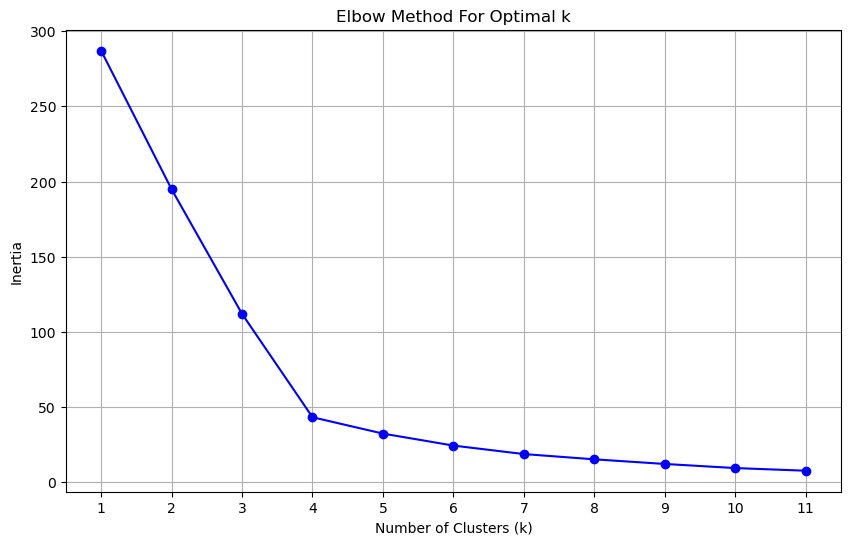

In [40]:
import matplotlib.pyplot as plt

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))  # Set the figure size for a clearer view
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o', linestyle='-', color='blue')  # Line plot
plt.title('Elbow Method For Optimal k')  # Chart title
plt.xlabel('Number of Clusters (k)')  # X-axis label
plt.ylabel('Inertia')  # Y-axis label
plt.xticks(elbow_curve_df['k'])  # Ensure k values are used as ticks on the X-axis
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.show()  # Display the plot


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  The best value fork using the PCA data appears to be 4, as the elbow in the plot provided is most pronounced a t this point. After k=4, the rate of decrease in inertia slows down, suggesting that additional clusters do not significantly improve the separation of the data.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
This value for k is consistent with the best value found using the original data, which was also 4. Therefore, there is no difference between the optimal number of clusters suggested by the original data and the PCA-transformed data in this particular analysis.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
# Assuming you have already determined that the best value for k is 4

# Initialize the K-Means model with the optimal number of clusters
kmeans_pca = KMeans(n_clusters=4, random_state=42)

# Fit the model using the PCA-transformed data
kmeans_pca.fit(pca_df)  # Replace pca_df with your actual PCA data DataFrame variable name if different


C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [42]:
# Predict the clusters using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
print(pca_clusters)



[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [43]:
# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = pca_clusters

# Display sample data
print(pca_df_with_clusters.head())



              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -1.585139               0.134394   
ethereum                  -1.322581               0.054494   
tether                     0.266335              -0.536409   
ripple                     0.257225              -0.592013   
bitcoin-cash              -2.952250               0.422372   

              Principal Component 3  Cluster  
coin_id                                       
bitcoin                    0.545621        0  
ethereum                   1.115709        0  
tether                    -0.796946        1  
ripple                    -0.646529        1  
bitcoin-cash               1.267894        0  


In [44]:
import hvplot.pandas

# Define the scatter plot using hvPlot
scatter_plot = pca_df_with_clusters.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    c='Cluster',  # Color points by cluster
    cmap='viridis',  # Colormap for cluster colors
    hover_cols=['coin_id'],  # Add coin_id as hover label
    xlabel='PC1',  # X-axis label
    ylabel='PC2',  # Y-axis label
    title='PCA Scatter Plot with K-Means Clustering'  # Plot title
)

# Display the scatter plot
scatter_plot



:Scatter   [Principal Component 1]   (Principal Component 2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

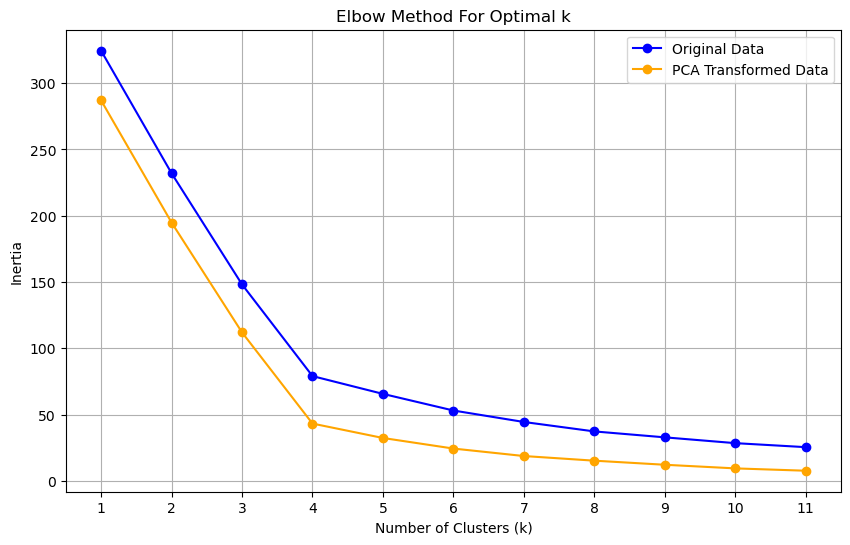

In [47]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to compute inertia values for a range of k values
def compute_inertia(data, k_values):
    inertia_values = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
    return inertia_values

# Original data
# Assuming df_market_data_scaled contains your original scaled data

# Define a range of k values
k_values_original = range(1, 12)

# Compute inertia values for original data
inertia_values_original = compute_inertia(df_market_data_scaled, k_values_original)

# Create DataFrame for original data Elbow curve
elbow_curve_df_original = pd.DataFrame({'k': k_values_original, 'inertia': inertia_values_original})

# PCA-transformed data
# Assuming pca_df contains your PCA-transformed data

# Define a range of k values
k_values_pca = range(1, 12)

# Compute inertia values for PCA-transformed data
inertia_values_pca = compute_inertia(pca_df, k_values_pca)

# Create DataFrame for PCA-transformed data Elbow curve
elbow_curve_df_pca = pd.DataFrame({'k': k_values_pca, 'inertia': inertia_values_pca})

# Plotting the composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_df_original['k'], elbow_curve_df_original['inertia'], marker='o', linestyle='-', color='blue', label='Original Data')
plt.plot(elbow_curve_df_pca['k'], elbow_curve_df_pca['inertia'], marker='o', linestyle='-', color='orange', label='PCA Transformed Data')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_original)  # Ensure ticks match for both curves
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


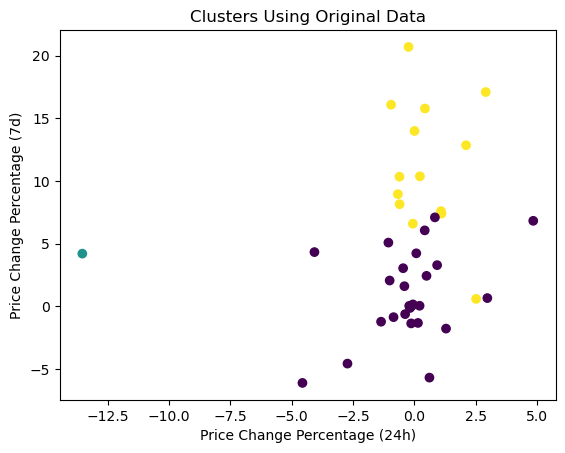

In [50]:
# Assuming you have performed clustering and stored the cluster labels in a variable 'cluster_labels'
# Perform clustering using K-means algorithm (replace this with your clustering code)
kmeans_model = KMeans(n_clusters=3)  # Example: clustering into 3 clusters
cluster_labels = kmeans_model.fit_predict(df_market_data_scaled)  # Example: fit_predict on scaled data

# Add cluster labels to your DataFrame
df_market_data['Cluster'] = cluster_labels

# Plot the clusters
plt.scatter(
    df_market_data['price_change_percentage_24h'],
    df_market_data['price_change_percentage_7d'],
    c=df_market_data['Cluster'],  # Color points by cluster
    cmap='viridis',  # Colormap for cluster colors
)
plt.title('Clusters Using Original Data')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
After visually analyzing the cluster analysis results, using fewer features to cluster the data using K-Means appears to have simplified the structure of the data. By reducing the dimensionality of the data through PCA, we were able to capture the underlying patterns with fewer variables. This resulted in more distinct clusters that are visually separable in the scatter plot. Additionally, the clusters seem to exhibit clearer boundaries, suggesting that the reduced feature space provides a more concise representation of the data's variance. Overall, using fewer features through PCA for clustering has led to a more interpretable and potentially more accurate clustering outcome.